In [ ]:
#import libraries:

import pandas as pd
import numpy as np
import holidays
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Load dataset:
df = pd.read_excel("Final Dataset.xlsx")
print(df.head())

        date   Open   High    Low  Close  Adj. Close  Change    Volume  \
0 2020-06-09  72.27  73.40  72.16  72.81       72.46  0.0066  28184980   
1 2020-06-10  72.98  73.71  72.81  73.29       72.94  0.0066  30503060   
2 2020-06-11  72.12  72.72  70.10  70.19       69.86 -0.0423  39826640   
3 2020-06-12  71.43  71.85  69.30  70.66       70.32  0.0067  38927340   
4 2020-06-15  69.54  71.24  69.40  70.99       70.65  0.0047  30121920   

        company                                              title  \
0  Alphabet Inc  Top 3 Ways to Unlock Google Discovery Ads Perf...   
1  Alphabet Inc  Google is tracking sustainable raw materials. ...   
2  Alphabet Inc  Lendlease’s Google job finally reopens - build...   
3  Alphabet Inc  Google Stadia: Does it live up to the hype six...   
4  Alphabet Inc  Google: Missing Churchill photo mystery explai...   

                                                link  \
0  https://news.google.com/rss/articles/CBMic0FVX...   
1  https://news.google

In [ ]:
#number of rows and columns:
print(f"Initial dataset shape: {df.shape}")

Initial dataset shape: (7320, 17)


In [ ]:
#To know the name of each coulmn in the dataset:
column_names = list(df.columns)
print("All column names in the data set:",column_names)

All column names in the data set: ['date', 'Open', 'High', 'Low', 'Close', 'Adj. Close', 'Change', 'Volume', 'company', 'title', 'link', 'Text', 'Sentiment Score', 'Sentiment Label', 'Sentiment_Label_Num', 'Next_Close', 'Price_Up']


In [ ]:
# Remove duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate rows found: {duplicates}")

Duplicate rows found: 0


In [ ]:
#Missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
date                   0
Open                   0
High                   0
Low                    0
Close                  0
Adj. Close             0
Change                 0
Volume                 0
company                0
title                  0
link                   0
Text                   0
Sentiment Score        0
Sentiment Label        0
Sentiment_Label_Num    0
Next_Close             0
Price_Up               0
dtype: int64


In [ ]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

In [ ]:
# Sort by date and company
df = df.sort_values(['company', 'date']).reset_index(drop=True)

In [ ]:
#find the companies that are actually in:
print("\nNumber of companies:", df['company'].nunique())
print("Companies:", df['company'].unique()[:5])


Number of companies: 6
Companies: ['Alphabet Inc' 'Amazon' 'Apple' 'Meta' 'NVIDIA']


In [ ]:
# Check target distribution
print(f"\nTarget distribution for Price_Up:")
print(df['Price_Up'].value_counts())


Target distribution for Price_Up:
Price_Up
1    3864
0    3456
Name: count, dtype: int64


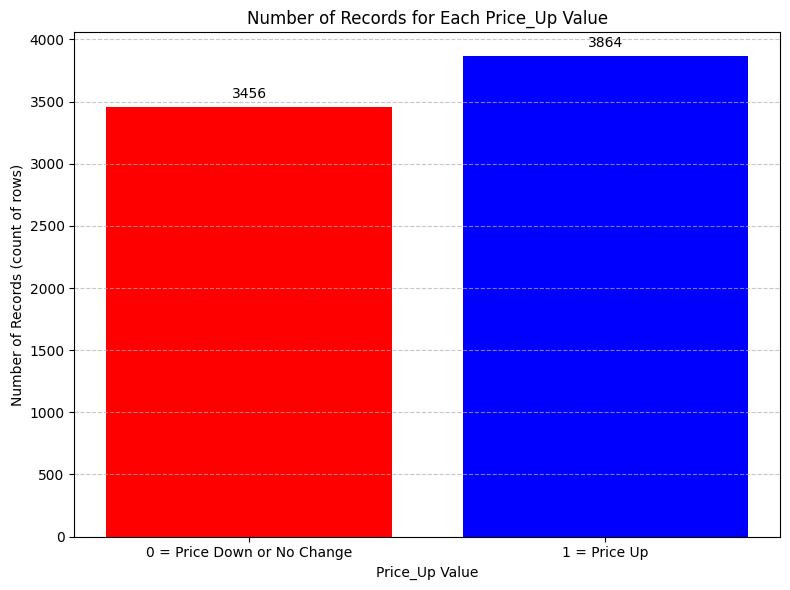

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each class in the 'Price_Up' column
price_up_counts = df['Price_Up'].value_counts().sort_index()

# Bar labels for x-axis
labels = ['0 = Price Down or No Change', '1 = Price Up']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, price_up_counts, color=['red', 'blue'])

# Add count labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 50, f'{int(yval)}', ha='center', va='bottom')

# Add titles and axis labels
plt.title('Number of Records for Each Price_Up Value')
plt.xlabel('Price_Up Value')
plt.ylabel('Number of Records (count of rows)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
#class balance/imbalance:
df['Price_Up'].value_counts(normalize=True)

Price_Up
1    0.527869
0    0.472131
Name: proportion, dtype: float64

In [ ]:
#Keep rows with valid news headlines and stock data:
df.dropna(subset=['title', 'Close', 'Next_Close', 'Price_Up'], inplace=True)

In [ ]:
#Count number of news articles per day
news_count = df.groupby('date').size().reset_index(name='news_count')
print(news_count)

           date  news_count
0    2020-06-09           6
1    2020-06-10           6
2    2020-06-11           6
3    2020-06-12           6
4    2020-06-15           6
...         ...         ...
1250 2025-05-30           6
1251 2025-06-02           6
1252 2025-06-03           6
1253 2025-06-04           6
1254 2025-06-05           6

[1255 rows x 2 columns]


In [ ]:
#Merge back into main dataframe
df = df.merge(news_count, on='date', how='left')
print(df.head())

        date   Open   High    Low  Close  Adj. Close  Change    Volume  \
0 2020-06-09  72.27  73.40  72.16  72.81       72.46  0.0066  28184980   
1 2020-06-10  72.98  73.71  72.81  73.29       72.94  0.0066  30503060   
2 2020-06-11  72.12  72.72  70.10  70.19       69.86 -0.0423  39826640   
3 2020-06-12  71.43  71.85  69.30  70.66       70.32  0.0067  38927340   
4 2020-06-15  69.54  71.24  69.40  70.99       70.65  0.0047  30121920   

        company                                              title  \
0  Alphabet Inc  Top 3 Ways to Unlock Google Discovery Ads Perf...   
1  Alphabet Inc  Google is tracking sustainable raw materials. ...   
2  Alphabet Inc  Lendlease’s Google job finally reopens - build...   
3  Alphabet Inc  Google Stadia: Does it live up to the hype six...   
4  Alphabet Inc  Google: Missing Churchill photo mystery explai...   

                                                link  \
0  https://news.google.com/rss/articles/CBMic0FVX...   
1  https://news.google

In [ ]:
#Sort by date
df = df.sort_values('date').reset_index(drop=True)
print(df.head())

        date    Open    High     Low   Close  Adj. Close  Change     Volume  \
0 2020-06-09   72.27   73.40   72.16   72.81       72.46  0.0066   28184980   
1 2020-06-09   83.04   86.40   83.00   86.00       83.60  0.0316  147712364   
2 2020-06-09  231.52  239.77  230.41  238.67      237.56  0.0314   27462872   
3 2020-06-09   62.67   63.63   61.60   62.71       62.71 -0.0097  170822310   
4 2020-06-09    8.80    9.11    8.75    9.05        9.02  0.0274  468488840   

        company                                              title  \
0  Alphabet Inc  Top 3 Ways to Unlock Google Discovery Ads Perf...   
1         Apple  Ryan Newman promoted to Head of Editorial for ...   
2          Meta  Physical activity and sedentary behaviour in t...   
3         Tesla  Tesla launches new car-sharing feature to simp...   
4        NVIDIA  Exclusive info about NVIDIA's Ampere: 3 models...   

                                                link  \
0  https://news.google.com/rss/articles/CBMic0FV

In [ ]:
#checks before proceeding from pre-processing:
print(f"Cleaned Data Size: {df.shape}")
print(f"Unique Trading Days: {df['date'].nunique()}")
print(f"Average News Articles per Day: {df['news_count'].mean():.2f}")
print(df[['date', 'company', 'title', 'Close', 'Next_Close', 'Price_Up', 'news_count']].head())

Cleaned Data Size: (7320, 18)
Unique Trading Days: 1255
Average News Articles per Day: 5.86
        date       company                                              title  \
0 2020-06-09  Alphabet Inc  Top 3 Ways to Unlock Google Discovery Ads Perf...   
1 2020-06-09         Apple  Ryan Newman promoted to Head of Editorial for ...   
2 2020-06-09          Meta  Physical activity and sedentary behaviour in t...   
3 2020-06-09         Tesla  Tesla launches new car-sharing feature to simp...   
4 2020-06-09        NVIDIA  Exclusive info about NVIDIA's Ampere: 3 models...   

    Close  Next_Close  Price_Up  news_count  
0   72.81       73.29         1           6  
1   86.00       88.21         1           6  
2  238.67      236.73         0           6  
3   62.71       68.34         1           6  
4    9.05        9.37         1           6  


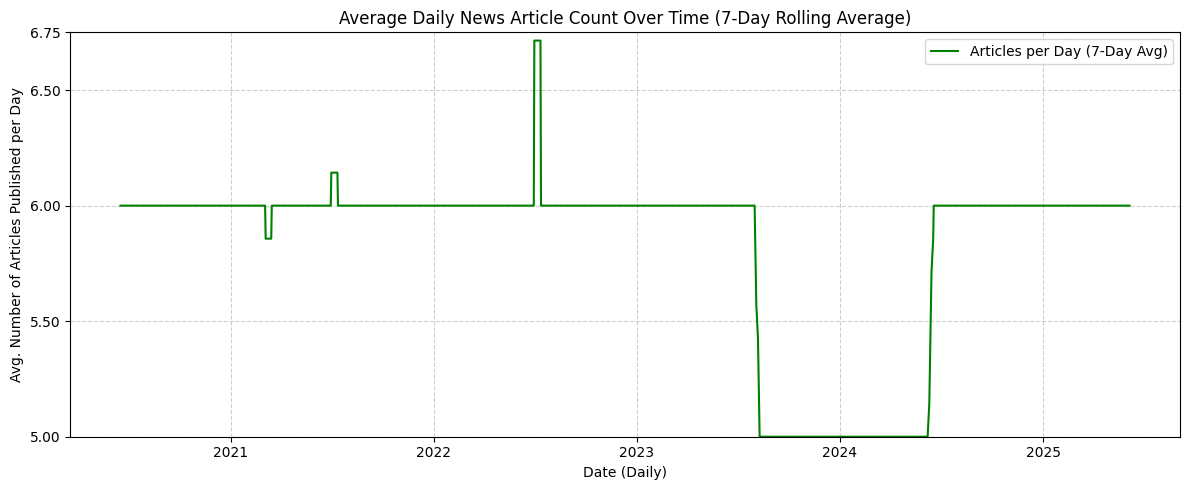

In [ ]:
#To observe trends in how frequently news articles are published over time, removing short-term daily fluctuations:
# Create figure:
plt.figure(figsize=(12, 5))

# Compute 7-day rolling average of news count:
news_count['rolling_avg'] = news_count['news_count'].rolling(window=7).mean()

# Plot rolling average:
plt.plot(news_count['date'], news_count['rolling_avg'], color='green', label='Articles per Day (7-Day Avg)')

# Title:
plt.title("Average Daily News Article Count Over Time (7-Day Rolling Average)")

# X-axis:
plt.xlabel("Date (Daily)")

# Y-axis:
plt.ylabel("Avg. Number of Articles Published per Day")
plt.ylim(5, 6.75)
plt.yticks([5.0, 5.5, 6.0, 6.5, 6.75])


plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.ticker as mtick

def plot_sentiment_vs_price(sentiment, price_color, bar_color):
    # Filter by sentiment:
    company_df = df[df['Sentiment Label'] == sentiment]

    # Group by date to get daily close stock:
    daily_close = company_df.groupby('date')['Close'].mean()

    # Count of articles with this sentiment per day:
    daily_sentiment = company_df.groupby('date').size()
    daily_sentiment = daily_sentiment.reindex(daily_close.index, fill_value=0)

    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Left y-axis:
    ax1.set_xlabel('Date (Trading Days)', fontsize=12)
    ax1.set_ylabel('Average Close Price (USD)', color=price_color, fontsize=12)
    ax1.plot(daily_close.index, daily_close.values, color=price_color, label='Stock Close Price')
    ax1.tick_params(axis='y', labelcolor=price_color)
    ax1.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.2f}'))

    # Right y-axis:
    ax2 = ax1.twinx()
    ax2.set_ylabel(f"Number of '{sentiment}' Articles Per Day", color=bar_color, fontsize=12)
    ax2.bar(daily_sentiment.index, daily_sentiment.values, color=bar_color, alpha=0.3,
            label=f"{sentiment} Sentiment Count")
    ax2.tick_params(axis='y', labelcolor=bar_color)

    # Title, formatting, and layout
    plt.title(f"'{sentiment}' Sentiment Article Frequency vs Stock Price Over Time", fontsize=14)
    ax1.grid(True, linestyle='--', alpha=0.5)
    fig.autofmt_xdate()
    fig.tight_layout()
    plt.show()

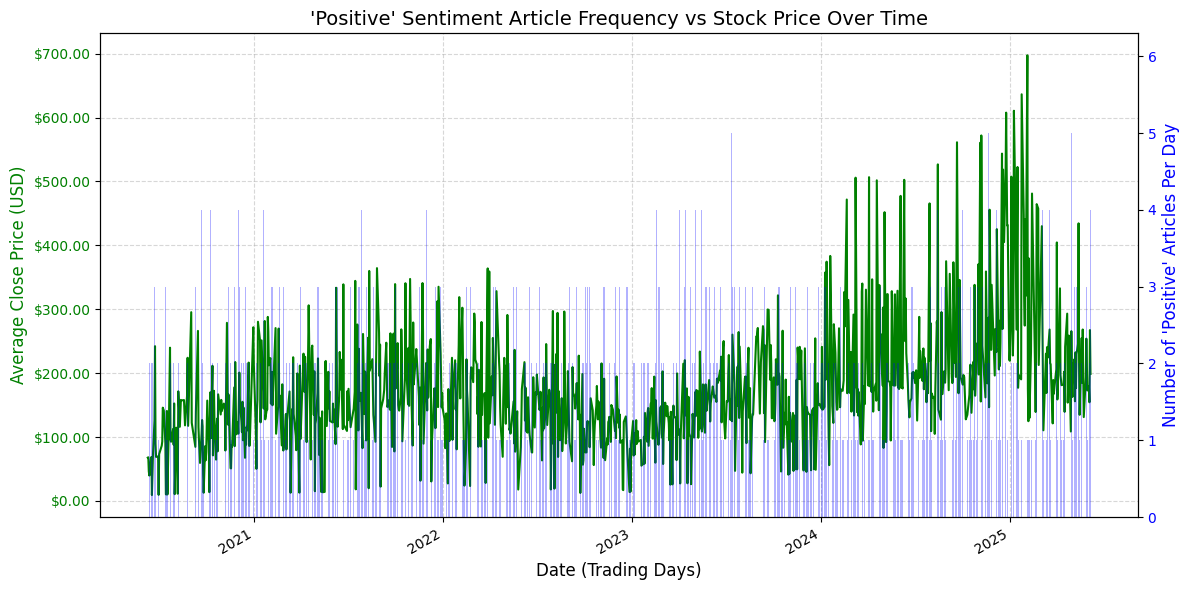

In [ ]:
#postive:
plot_sentiment_vs_price('Positive', 'green', 'blue')

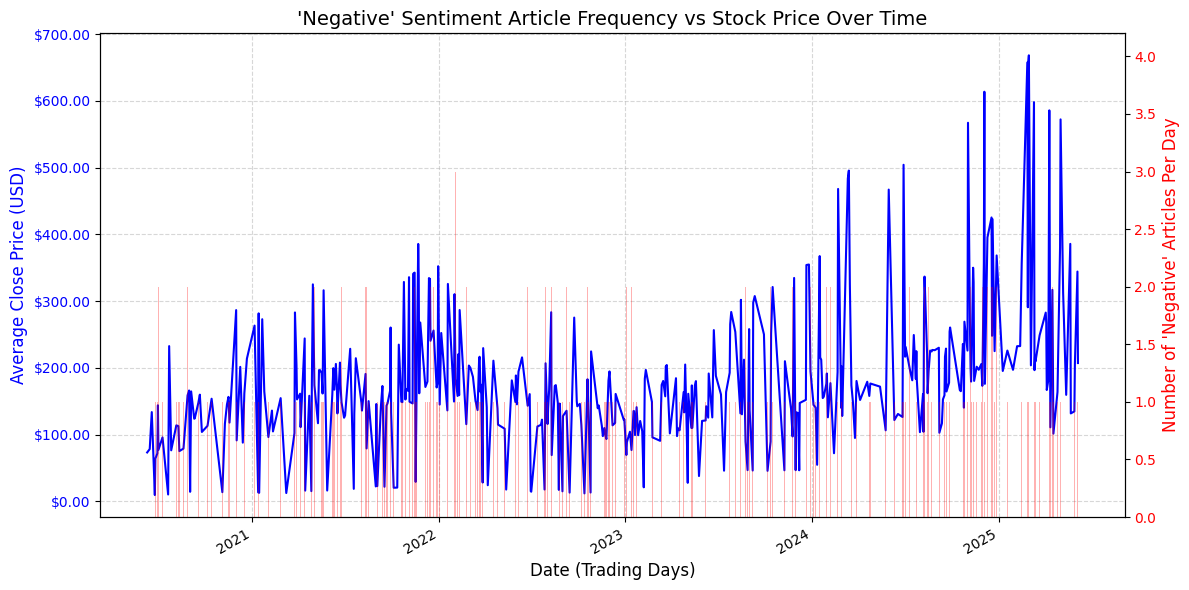

In [ ]:
#Negative:
plot_sentiment_vs_price('Negative', 'blue', 'red')

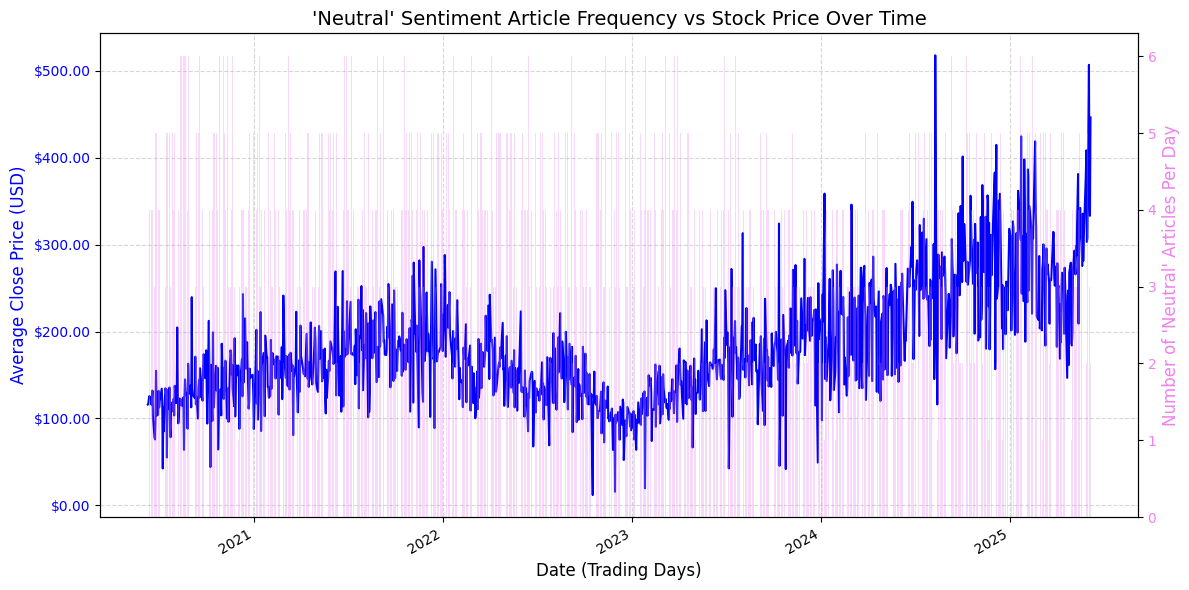

In [ ]:
#Neutral:
plot_sentiment_vs_price('Neutral', 'blue', 'violet')

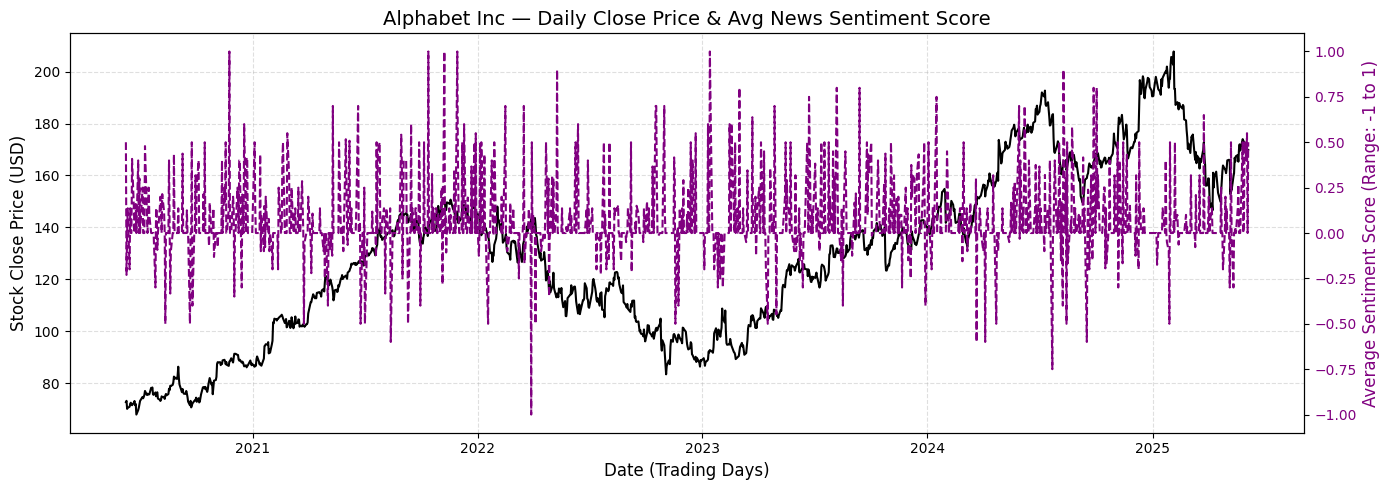

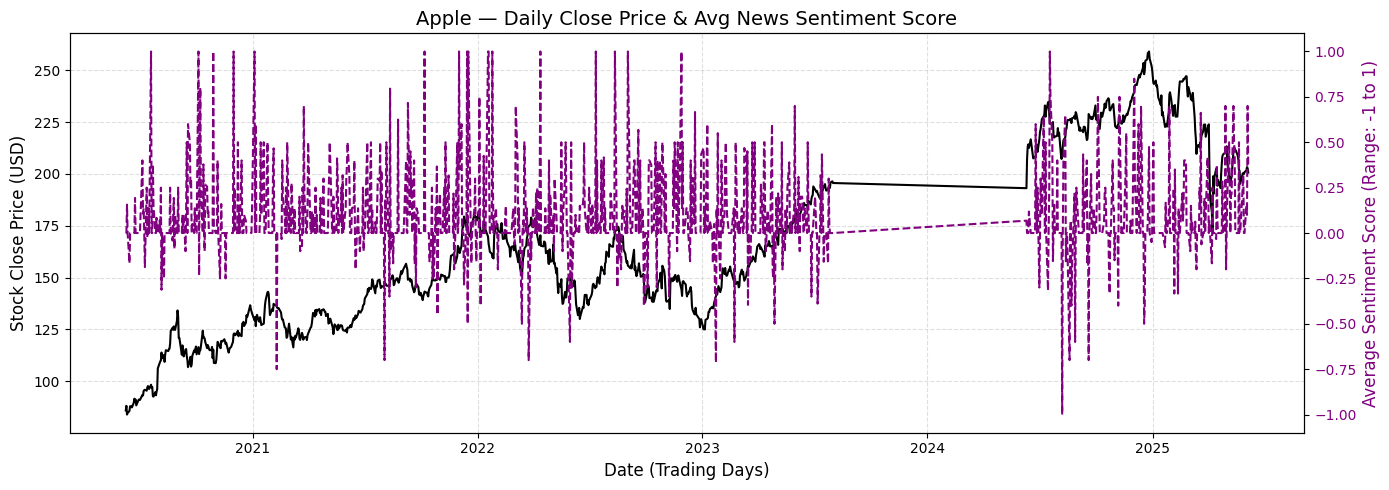

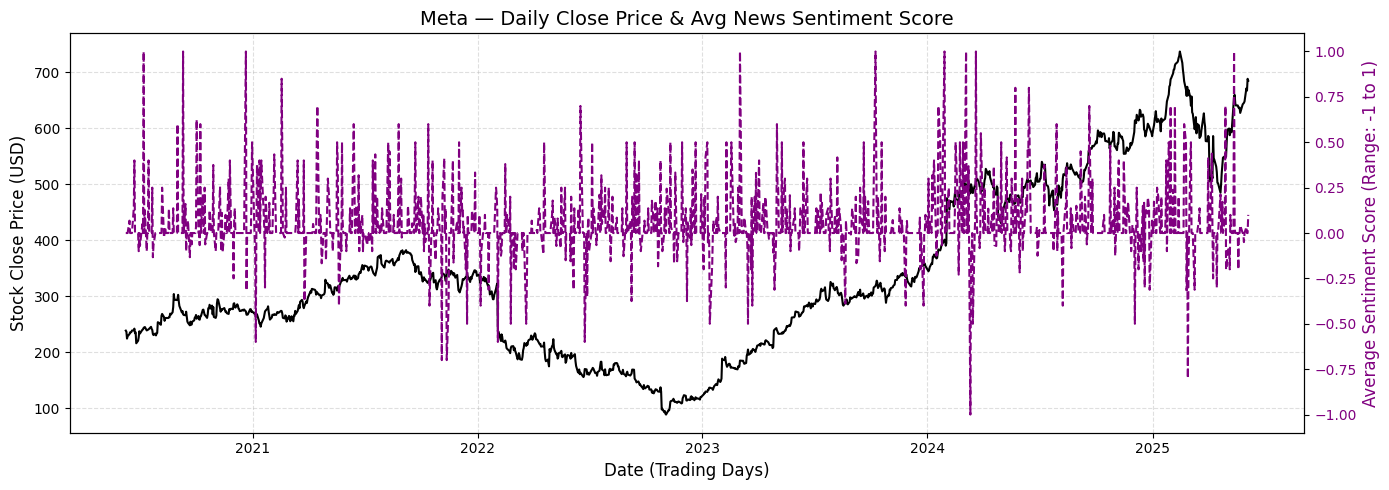

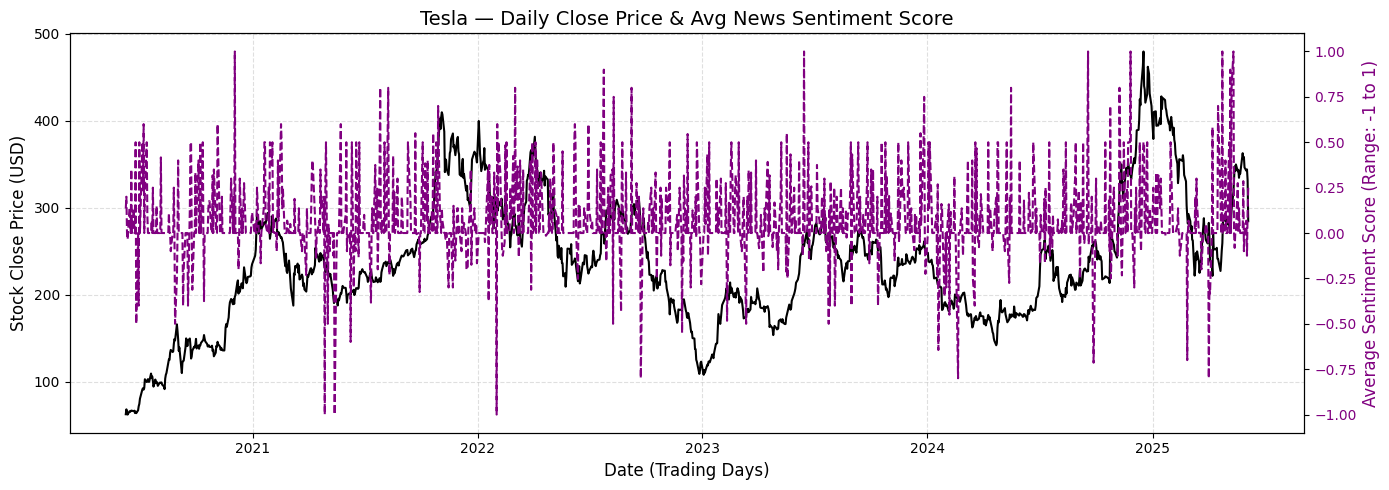

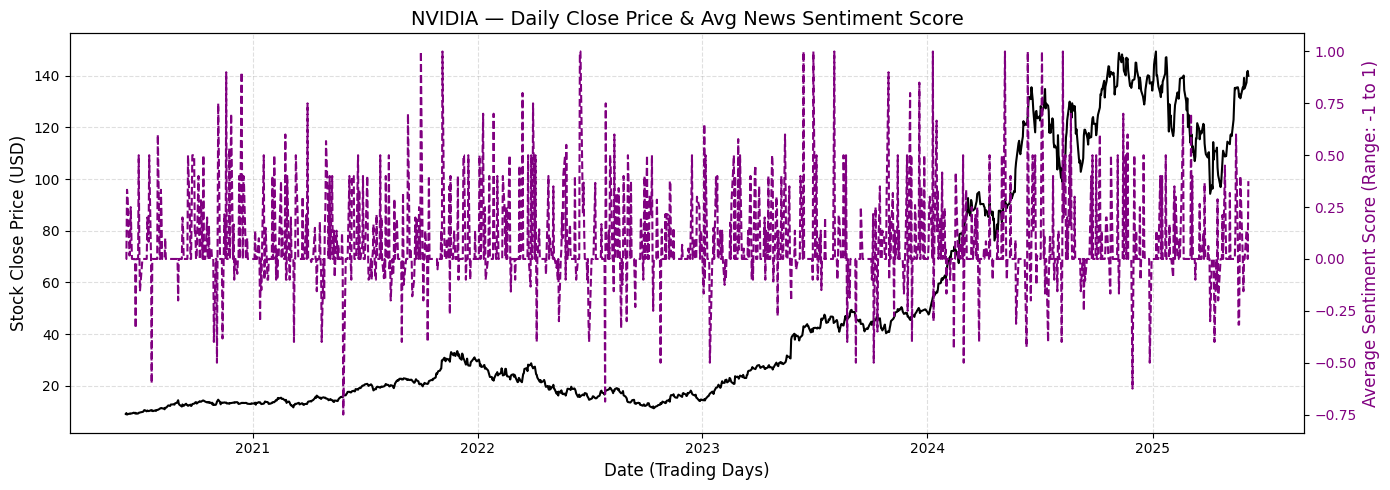

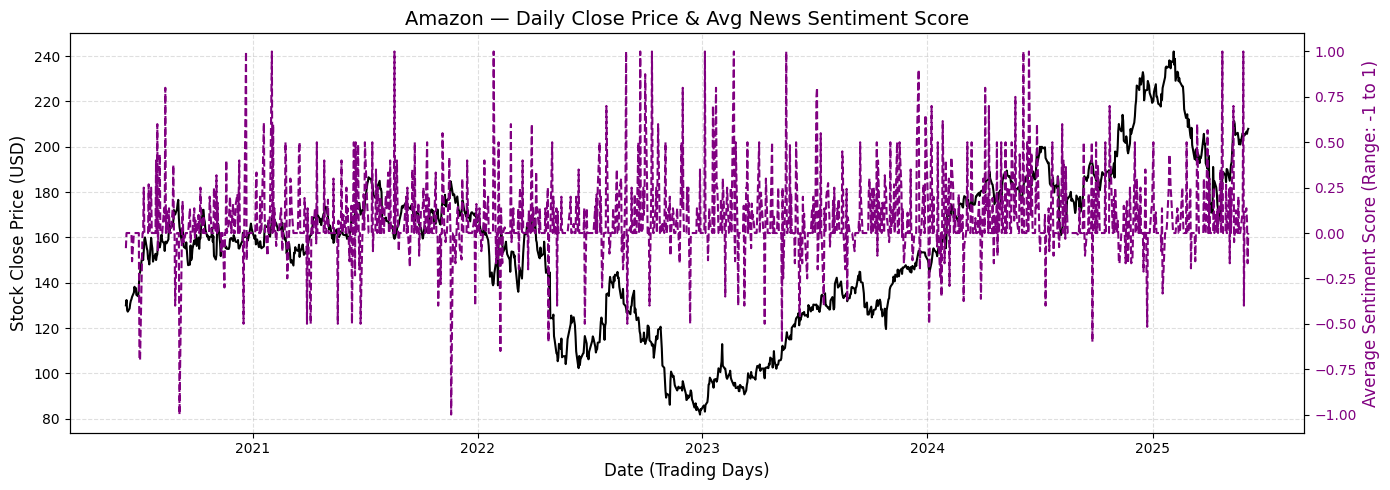

In [ ]:
# company-wise sentiment vs price:
def plot_company_sentiment_score(company_name, price_color='black', score_color='purple'):
    company_df = df[df['company'] == company_name].copy()

    # Group by date:
    daily_sentiment = company_df.groupby('date')['Sentiment Score'].mean()
    daily_close = company_df.groupby('date')['Close'].mean()

    # align indexes:
    daily_sentiment = daily_sentiment.reindex(daily_close.index, fill_value=0)

    # Plot setup:
    fig, ax1 = plt.subplots(figsize=(14, 5))
    ax1.set_title(f'{company_name} — Daily Close Price & Avg News Sentiment Score', fontsize=14)
    ax1.set_xlabel('Date (Trading Days)', fontsize=12)
    ax1.set_ylabel('Stock Close Price (USD)', color=price_color, fontsize=12)
    ax1.plot(daily_close.index, daily_close.values, color=price_color, label='Close Price')
    ax1.tick_params(axis='y', labelcolor=price_color)


    ax2 = ax1.twinx()
    ax2.set_ylabel('Average Sentiment Score (Range: -1 to 1)', color=score_color, fontsize=12)
    ax2.plot(daily_sentiment.index, daily_sentiment.values, color=score_color,
             linestyle='dashed', label='Sentiment Score')
    ax2.tick_params(axis='y', labelcolor=score_color)


    ax1.grid(True, linestyle='--', alpha=0.4)
    fig.tight_layout()
    plt.show()

# Run for all companies
for company in df['company'].unique():
    plot_company_sentiment_score(company)


In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
from tqdm import tqdm

In [ ]:
#Load FinBERT pre-trained model
tokenizer = AutoTokenizer.from_pretrained("yiyanghkust/finbert-tone")
model = AutoModel.from_pretrained("yiyanghkust/finbert-tone")

In [ ]:
#Function to get FinBERT embedding (mean-pooled) for each news headline:

def get_finbert_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

In [ ]:
#Calculate embeddings for all news headlines:
print("Generating FinBERT embeddings for each news headline...")
embeddings = []
for text in tqdm(df['title']):
    try:
        emb = get_finbert_embedding(str(text))
    except:
        emb = np.zeros(768)  # fallback in case of error
    embeddings.append(emb)

Generating FinBERT embeddings for each news headline...


100%|████████████████████████████████████████████████████████████████████████████| 7320/7320 [1:00:54<00:00,  2.00it/s]


In [ ]:
#Convert to DataFrame:
embedding_df = pd.DataFrame(embeddings, columns=[f"embed_{i+1}" for i in range(768)])

In [ ]:
#Merge embeddings to main df:
df_embeddings = pd.concat([df.reset_index(drop=True), embedding_df], axis=1)

In [ ]:
#Daily Mean Pooling of Embeddings (768 Features per Day):
#Group by date and compute mean embedding per day:
embedding_cols = [col for col in df_embeddings.columns if 'embed_' in col]
daily_embeddings = df_embeddings.groupby('date')[embedding_cols].mean().reset_index()

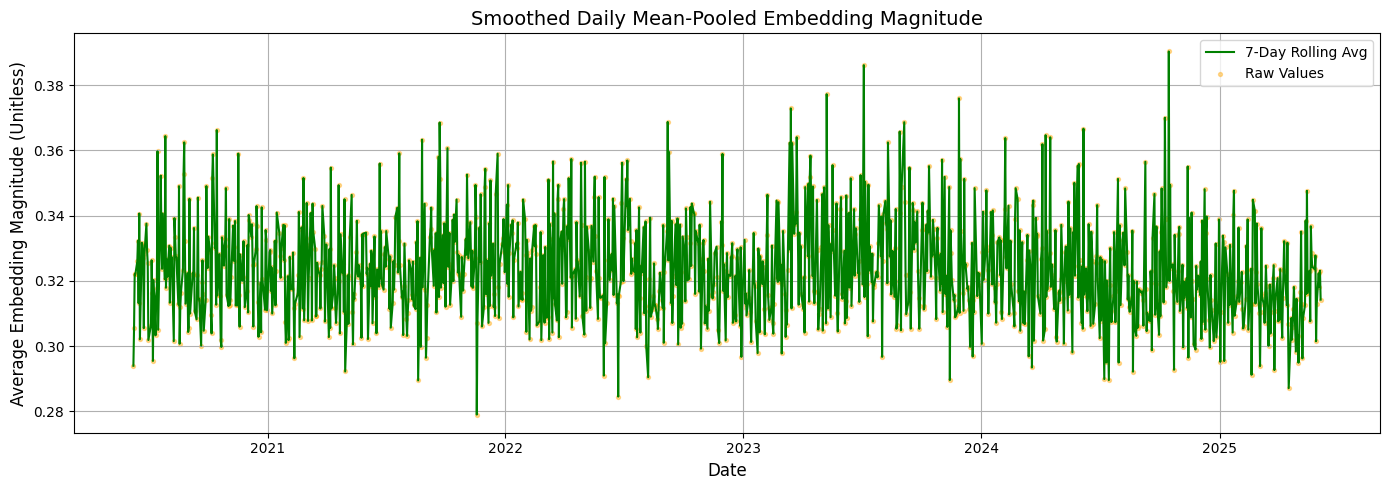

In [ ]:
# Compute average embedding magnitude for each day:
# Units: unitless (embedding values are abstract numerical vectors)
daily_embeddings['mean_magnitude'] = daily_embeddings[embedding_cols].abs().mean(axis=1)
daily_embeddings['rolling_avg'] = daily_embeddings['mean_magnitude'].rolling(window=7).mean()


# Plot the mean embedding magnitude over time:
plt.figure(figsize=(14, 5))
plt.plot(
    daily_embeddings['date'],
    daily_embeddings['mean_magnitude'],
    color='green',
    label='7-Day Rolling Avg'
)
plt.scatter(
    daily_embeddings['date'],
    daily_embeddings['mean_magnitude'],
    color='orange',
    s=8,
    alpha=0.4,
    label='Raw Values'
)
plt.title('Smoothed Daily Mean-Pooled Embedding Magnitude', fontsize=14)

# Label axes clearly
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Embedding Magnitude (Unitless)', fontsize=12)

# Add legend and grid
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Check shape, after adding the embedded features:
print(f"Daily embedding shape: {daily_embeddings.shape}")
print(daily_embeddings.head())

Daily embedding shape: (1255, 771)
        date   embed_1   embed_2   embed_3   embed_4   embed_5   embed_6  \
0 2020-06-09 -0.080811 -0.356834 -0.226898  0.323773  0.357536 -0.457113   
1 2020-06-10 -0.017857 -0.630967 -0.463345  0.364916  0.630824 -0.592038   
2 2020-06-11 -0.135972 -0.574339 -0.454094  0.438639  0.845842 -0.610869   
3 2020-06-12 -0.241054 -0.528456 -0.244309  0.484877  0.463740 -0.639643   
4 2020-06-15 -0.200239 -0.558641 -0.315188  0.329300  0.327015 -0.647579   

    embed_7   embed_8   embed_9  ...  embed_761  embed_762  embed_763  \
0 -0.080015  0.239131 -0.394370  ...   0.300819  -0.457017   0.346783   
1  0.162815  0.094149 -0.234808  ...   0.494266  -0.440862   0.506248   
2  0.303741 -0.015288 -0.469287  ...   0.247845  -0.084129   0.189473   
3  0.116758  0.230488 -0.143381  ...   0.511365  -0.275290   0.443380   
4 -0.023035  0.220415 -0.527514  ...   0.381068  -0.097777   0.491070   

   embed_764  embed_765  embed_766  embed_767  embed_768  mean_magnit

In [ ]:
#embedding will helps to:
#This replaces Sentiment Score/Label with much richer sentiment representation

In [ ]:
#Technical indicators for financial features:

import pandas as pd
import pandas_ta as ta

In [ ]:
#Group stock data by date (daily OHLCV):

stock_data = df.groupby('date').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
}).reset_index()

In [ ]:
#shows which rows has NaN:
print(stock_data.isna().sum())

date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [ ]:
#technical indicators:
stock_data.ta.ema(length=14, append=True)   # EMA 14
stock_data.ta.rsi(length=14, append=True)   # RSI 14
stock_data.ta.macd(append=True)             # MACD
stock_data.ta.bbands(length=20, append=True) # Bollinger Bands
stock_data.ta.atr(length=14, append=True)   # ATR (Average True Range)

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1250    499.266209
1251    502.022909
1252    504.566272
1253    507.772253
1254    511.184949
Name: ATRr_14, Length: 1255, dtype: float64

In [ ]:
#Drop NaNs after all calculations
stock_data.dropna(inplace=True)

In [ ]:
#Confirm clean dataset
print(f"Clean dataset shape after indicator caluculation: {stock_data.shape}")
print(stock_data.head())

Clean dataset shape after indicator caluculation: (1222, 17)
         date   Open    High    Low   Close      Volume      EMA_14  \
33 2020-07-27  10.23  234.95  10.22  102.64   775566950  106.339467   
34 2020-07-28  10.37  234.96  10.21  150.02   723138652  112.163538   
35 2020-07-29  93.75  233.70  10.35   10.47   611440528   98.604400   
36 2020-07-30  10.38  234.89  10.30   99.17   757934291   98.679813   
37 2020-07-31  10.56  255.85  10.43   74.15  1227564005   95.409172   

       RSI_14  MACD_12_26_9  MACDh_12_26_9  MACDs_12_26_9  BBL_20_2.0  \
33  49.428482     -7.653555      -7.040957      -0.612598  -26.671282   
34  51.730536     -3.415335      -2.242189      -1.173146  -22.326128   
35  45.203697    -11.188064      -8.011935      -3.176129  -33.467670   
36  49.559920    -10.074527      -5.518718      -4.555809  -21.506285   
37  48.391297    -11.083186      -5.221901      -5.861284  -23.142353   

    BBM_20_2.0  BBU_20_2.0  BBB_20_2.0  BBP_20_2.0     ATRr_14  
33    11

In [ ]:
#lag features:
stock_data['RSI_prev'] = stock_data['RSI_14'].shift(1)
stock_data['EMA_prev'] = stock_data['EMA_14'].shift(1)
stock_data.dropna(inplace=True)

In [ ]:
# Merge indicators with daily embedding : (on date column to create the final feature set):
final_df = pd.merge(daily_embeddings, stock_data, on='date', how='inner')

#Sort by date just to be safe:
final_df = final_df.sort_values('date').reset_index(drop=True)

In [ ]:
#Add Lag Features: (ex:RSI lags)
for lag in [1, 2, 3]:
    final_df[f'RSI_lag{lag}'] = final_df['RSI_14'].shift(lag)

In [ ]:
print(f"Final dataset shape after embeddings + technical indicators: {final_df.shape}")
print(final_df.head())

Final dataset shape after embeddings + technical indicators: (1221, 792)
        date   embed_1   embed_2   embed_3   embed_4   embed_5   embed_6  \
0 2020-07-28 -0.214369 -0.948162 -0.324175  0.824764  0.773445 -1.043800   
1 2020-07-29 -0.124625 -0.595081 -0.163777  0.512090  0.505443 -0.994958   
2 2020-07-30 -0.442042 -0.475106 -0.440136  0.513449  0.542105 -0.696209   
3 2020-07-31 -0.021016 -0.560562 -0.224946  0.663984  0.622298 -0.591124   
4 2020-08-03 -0.203526 -0.692774 -0.296327  0.653694  0.587177 -0.709042   

    embed_7   embed_8   embed_9  ...  BBM_20_2.0  BBU_20_2.0  BBB_20_2.0  \
0  0.244714  0.113027 -0.141153  ...    114.7265  251.779128  238.920612   
1  0.396953  0.094116 -0.500164  ...    110.6900  254.847670  260.470991   
2  0.254862  0.263886 -0.510139  ...    115.1720  251.850285  237.346377   
3  0.111044  0.107598 -0.435368  ...    114.3280  251.798353  240.484138   
4  0.016660  0.208097 -0.182927  ...    110.3065  254.748730  261.892508   

   BBP_20_2.0

In [ ]:
#creating target labels: (This prepares data for classification models )
#Create Next_Close column:
final_df['Next_Close'] = final_df['Close'].shift(-1)

#Create Target Label: 1 if Next_Close > current Close else 0 :
final_df['Price_Up'] = ((final_df['Next_Close'] - final_df['Close']) / final_df['Close'] > 0.005).astype(int)

In [ ]:
#Drop the last row since Next_Close will be NaN there:
final_df.dropna(subset=['Next_Close'], inplace=True)
print(final_df.shape)

(1220, 794)


In [ ]:
#check:
print(final_df[['date', 'Close', 'Next_Close', 'Price_Up']].tail())
print(f"Final dataset ready with target label - Shape: {final_df.shape}")

           date   Close  Next_Close  Price_Up
1215 2025-05-29  205.70      200.85         0
1216 2025-05-30  200.85      201.70         0
1217 2025-06-02  201.70      203.27         1
1218 2025-06-03  203.27      202.82         0
1219 2025-06-04  202.82      284.70         1
Final dataset ready with target label - Shape: (1220, 794)


In [ ]:
#Label = 1 if the next day’s Close price is higher than current day, else 0
#Next_Close means tomorrow’s closing price for reference

In [ ]:
#ML classifiers:
#XGBoost

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
#pipeline:
#Features needed:
drop_cols = ['date', 'Next_Close', 'Price_Up']
feature_cols = [col for col in final_df.columns if col not in drop_cols]

In [ ]:
X = final_df[feature_cols]
y = final_df['Price_Up']

In [ ]:
#splitting data for train and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [ ]:
#shape of train and test data:
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (976, 791), Test shape: (244, 791)


In [ ]:
#classification:
from xgboost import XGBClassifier
SEQ_LEN = 30

X_train_xgb = X.iloc[:-SEQ_LEN]
X_test_xgb = X.iloc[-SEQ_LEN:]
y_train_xgb = y.iloc[:-SEQ_LEN]
y_test_xgb = y.iloc[-SEQ_LEN:]

In [ ]:
xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6)
xgb_model.fit(X_train_xgb, y_train_xgb)
pred_xgb_prob = xgb_model.predict_proba(X_test_xgb)[:,1]

In [ ]:
# Convert probabilities to class labels
pred_xgb_label = (pred_xgb_prob >= 0.5).astype(int)

# Accuracy
acc = (accuracy_score(y_test_xgb, pred_xgb_label)*100)
print(f"Accuracy: {acc:.2f}")

Accuracy: 70.00


In [ ]:
print(classification_report(y_test_xgb, pred_xgb_label))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73        16
           1       0.69      0.64      0.67        14

    accuracy                           0.70        30
   macro avg       0.70      0.70      0.70        30
weighted avg       0.70      0.70      0.70        30



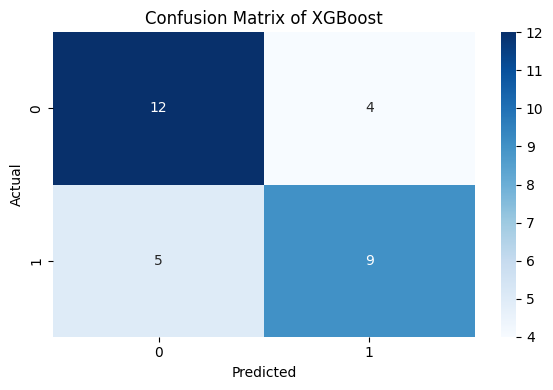

In [ ]:
# Confusion matrix:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
cm = confusion_matrix(y_test_xgb, pred_xgb_label)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix of XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

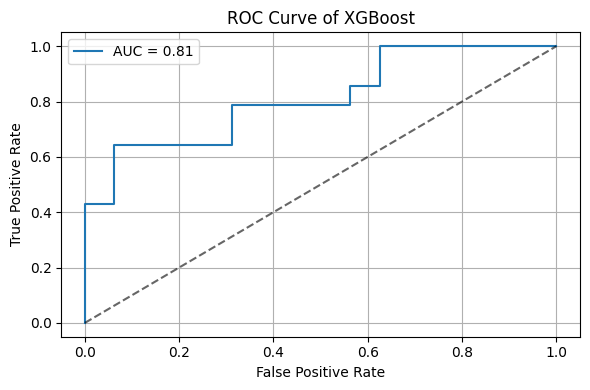

In [ ]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test_xgb, pred_xgb_prob)
roc_auc = roc_auc_score(y_test_xgb, pred_xgb_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], 'k--', alpha=0.6)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve of XGBoost")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#BiLSTM + Attention:
#import libraries:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, Bidirectional, GlobalAveragePooling1D, Attention
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
# Sequence creation function
def create_seq(df, seq_len, features, target):
    X_seq, y_seq = [], []
    for i in range(len(df)-seq_len):
        X_seq.append(df[features].iloc[i:i+seq_len].values)
        y_seq.append(df[target].iloc[i+seq_len])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_seq(final_df, SEQ_LEN, feature_cols, 'Price_Up')
X_seq_train, X_seq_test = X_seq[:-SEQ_LEN], X_seq[-SEQ_LEN:]
y_seq_train, y_seq_test = y_seq[:-SEQ_LEN], y_seq[-SEQ_LEN:]

In [ ]:
inp = Input(shape=(X_seq_train.shape[1], X_seq_train.shape[2]))
x = Bidirectional(LSTM(64, return_sequences=True))(inp)
x = Attention()([x, x])
x = GlobalAveragePooling1D()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
out = Dense(1, activation='sigmoid')(x)
model = Model(inputs=inp, outputs=out)
model.compile(loss='binary_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
model.fit(X_seq_train, y_seq_train, epochs=25, batch_size=32, validation_split=0.1, verbose=1)
pred_lstm_prob = model.predict(X_seq_test).flatten()

Epoch 1/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - accuracy: 0.5064 - loss: 0.7038 - val_accuracy: 0.5431 - val_loss: 0.6927
Epoch 2/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5470 - loss: 0.6926 - val_accuracy: 0.5431 - val_loss: 0.6923
Epoch 3/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5336 - loss: 0.6924 - val_accuracy: 0.5431 - val_loss: 0.6919
Epoch 4/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5435 - loss: 0.6918 - val_accuracy: 0.5431 - val_loss: 0.6916
Epoch 5/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5690 - loss: 0.6904 - val_accuracy: 0.5431 - val_loss: 0.6912
Epoch 6/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5328 - loss: 0.6918 - val_accuracy: 0.5431 - val_loss: 0.6910
Epoch 7/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5240 - loss: 0.6922 - val_accuracy: 0.5431 - val_loss: 0.6909
Epoch 8/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5296 - loss: 0.6917 - val_accuracy: 0.5431 - v

In [ ]:
# Convert predicted probabilities to binary class labels
pred_lstm_class = (pred_lstm_prob >= 0.5).astype(int)

# Accuracy
accuracy = (accuracy_score(y_seq_test, pred_lstm_class)*100)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_seq_test, pred_lstm_class))

Accuracy: 53.3333

Classification Report:
              precision    recall  f1-score   support

           0       0.53      1.00      0.70        16
           1       0.00      0.00      0.00        14

    accuracy                           0.53        30
   macro avg       0.27      0.50      0.35        30
weighted avg       0.28      0.53      0.37        30



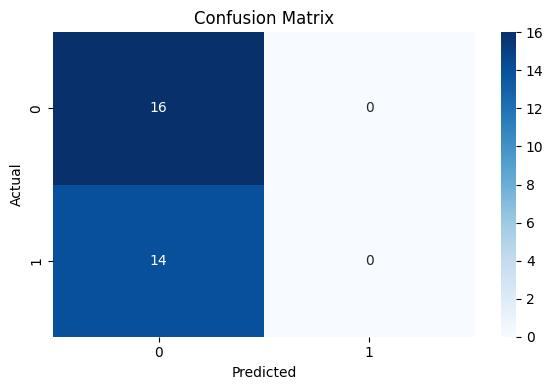

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_seq_test, pred_lstm_class)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

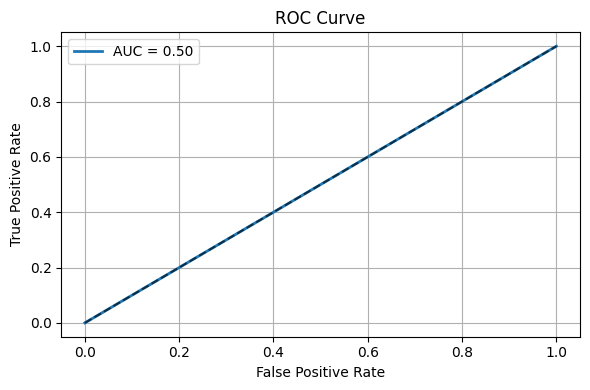

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_seq_test, pred_lstm_prob)
roc_auc = roc_auc_score(y_seq_test, pred_lstm_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.6)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Ensemble
ensemble_pred = (pred_xgb_prob + pred_lstm_prob) / 2
final_labels = (ensemble_pred > 0.5).astype(int)

In [ ]:
#metrics comparision:
#auc is used coz we have probabilities in our data:
auc_xgb = print("XGBoost:",(roc_auc_score(y_test_xgb, pred_xgb_prob)*100) if pred_xgb_prob is not None else 0)
auc_lstm = print("Bi-LSTM:", (roc_auc_score(y_seq_test, pred_lstm_prob)*100) if pred_lstm_prob is not None else 0)
auc_ensemble = print("Ensemble:", (roc_auc_score(y_seq_test, ensemble_pred)*100) if ensemble_pred is not None else 0)

XGBoost: 81.25
Bi-LSTM: 50.0
Ensemble: 81.25


In [ ]:
#Final Evaluation:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
final_labels = (ensemble_pred > 0.5).astype(int)

print(f"Final Ensemble Accuracy: {accuracy_score(y_seq_test, final_labels)*100:.2f}%")
print(classification_report(y_seq_test, final_labels))

Final Ensemble Accuracy: 70.00%
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        16
           1       0.69      0.64      0.67        14

    accuracy                           0.70        30
   macro avg       0.70      0.70      0.70        30
weighted avg       0.70      0.70      0.70        30



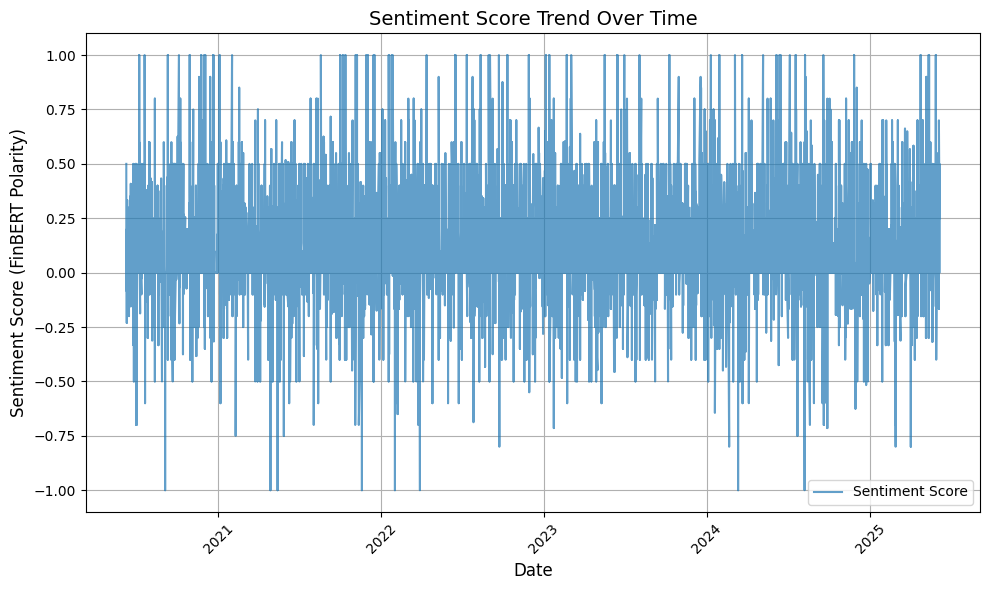

In [ ]:
# Sentiment Trend Over Time (shows how FinBERT polarity output changes over time):
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['Sentiment Score'], label='Sentiment Score', alpha=0.7)

# Titles and Labels with Clear Units
plt.title('Sentiment Score Trend Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sentiment Score (FinBERT Polarity)', fontsize=12)

# Format and Display
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


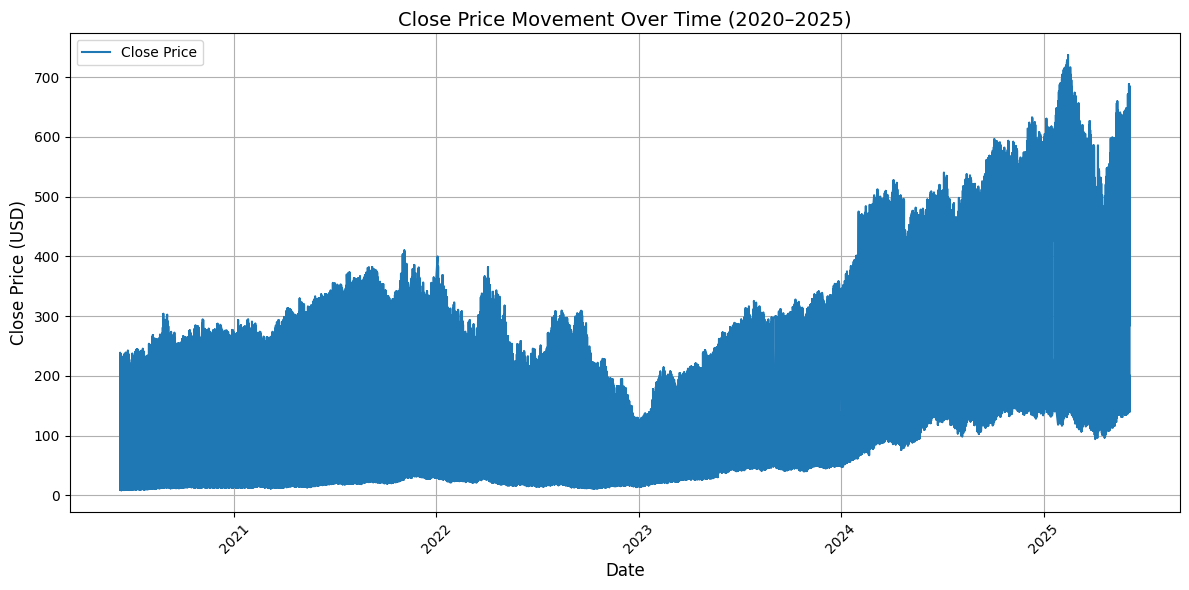

In [ ]:
#Close Price Movement Over Time:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['Close'], label='Close Price', color='tab:blue', linewidth=1.5)

plt.title('Close Price Movement Over Time (2020–2025)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price (USD)', fontsize=12)

plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()

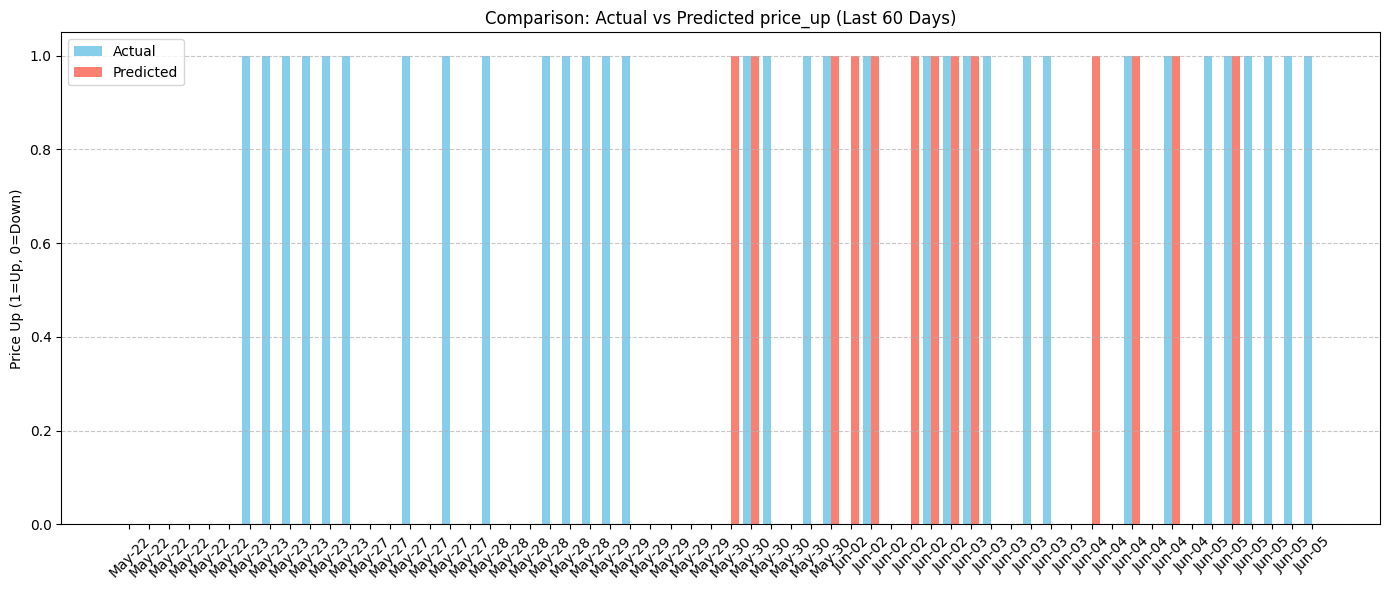

In [ ]:
# Select last 60 days window for clear viewing:
df['Prediction'] = 0
df.loc[df.index[-len(final_labels):], 'Prediction'] = final_labels

plot_df = df.tail(60).copy()
x = np.arange(len(plot_df))  # positions for bars
plt.figure(figsize=(14,6))

# Actual bars
plt.bar(x - 0.2, plot_df['Price_Up'], width=0.4, label='Actual', color='skyblue')

# Predicted bars
plt.bar(x + 0.2, plot_df['Prediction'], width=0.4, label='Predicted', color='salmon')

# Actual vs predicted pruce:
plt.xticks(x, plot_df['date'].dt.strftime('%b-%d'), rotation=45)
plt.ylabel('Price Up (1=Up, 0=Down)')
plt.title('Comparison: Actual vs Predicted price_up (Last 60 Days)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

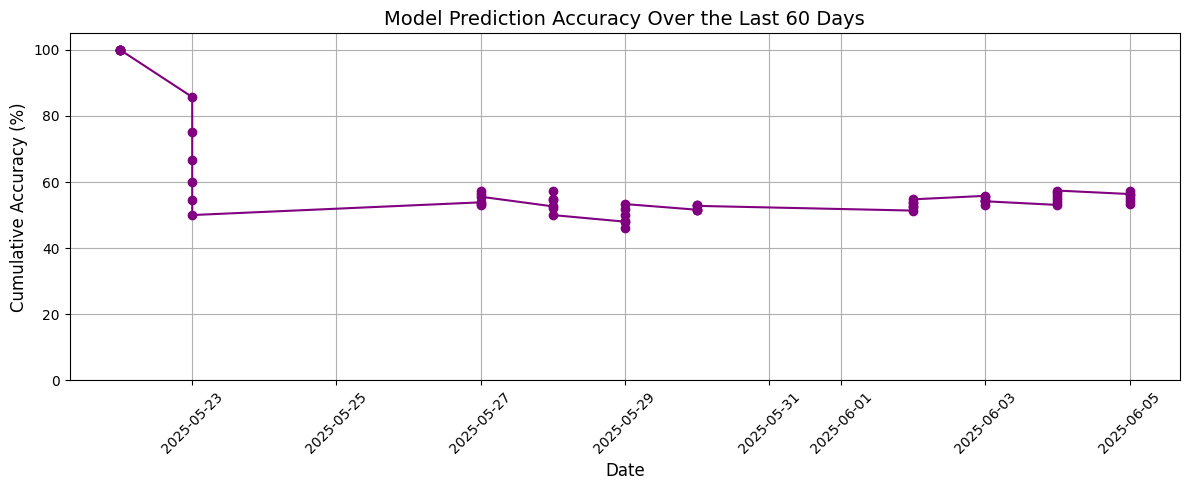

In [ ]:
#accuracy for last 60 days:(helps to track if your model gets better or worse over time)
plot_df = df.tail(60).copy()
correct_cumsum = (plot_df['Prediction'] == plot_df['Price_Up']).cumsum()

# Convert accuracy to percentage:
accuracy_over_time = 100 * correct_cumsum / (np.arange(len(plot_df)) + 1)


plt.figure(figsize=(12, 5))
plt.plot(plot_df['date'], accuracy_over_time, marker='o', color='purple')
plt.title('Model Prediction Accuracy Over the Last 60 Days', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Accuracy (%)', fontsize=12)
plt.ylim(0, 105)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()